In [250]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [251]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

In [252]:

model = torch.hub.load('ultralytics/yolov5', 'custom', path='cobest.pt', force_reload=True)
img = cv2.imread('test_data/8.jpg')
img = img[ 20: 660, 520: 1260]
model.eval()
results = model(img)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\anhpn/.cache\torch\hub\master.zip
YOLOv5  2022-12-20 Python-3.10.8 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


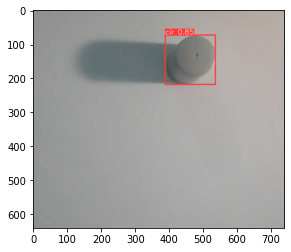

In [253]:
%matplotlib inline 
img = np.squeeze(results.render())
img_old = img.copy()
cv2.imwrite('test_data/result_yolo.jpg', img)
plt.imshow(np.squeeze(results.render()))
plt.show()

In [254]:
bboxes = results.xyxy

In [255]:
np.array(bboxes[0][0][0])

array(     388.63, dtype=float32)

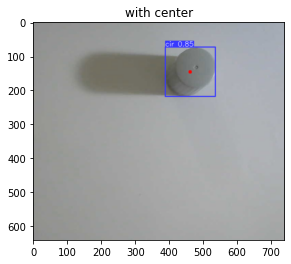

In [256]:
#tâm xác định bởi YOLO

x_p = (bboxes[0][0][0] + bboxes[0][0][2])/2
y_p = (bboxes[0][0][1] + bboxes[0][0][3])/2

img_with_center = cv2.circle(img, (int(x_p),int(y_p)), radius=0, color = (0,0,255), thickness = 10)
previewImg("with center", img_with_center)

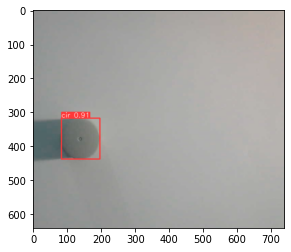

In [257]:
#tính tạo độ tâm khi vật thẳng với cam
img = cv2.imread('test_data/1.jpg')
img = img[ 20: 660, 520: 1260]
model.eval()
results = model(img)
bboxes = results.xyxy

%matplotlib inline 
img = np.squeeze(results.render())

cv2.imwrite('test_data/result_1_yolo.jpg', img)
plt.imshow(np.squeeze(results.render()))
plt.show()



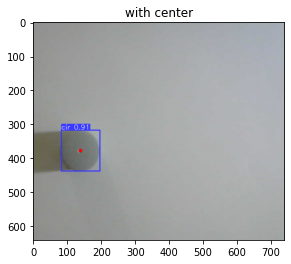

In [258]:
x_c = (bboxes[0][0][0] + bboxes[0][0][2])/2
y_c = (bboxes[0][0][1] + bboxes[0][0][3])/2

r_centers = abs(bboxes[0][0][0] - bboxes[0][0][2])/2
img_with_center = cv2.circle(img, (int(x_c),int(y_c)), radius=0, color = (0,0,255), thickness = 10)
previewImg("with center", img_with_center)

In [259]:
r_centers

tensor(56.78046)

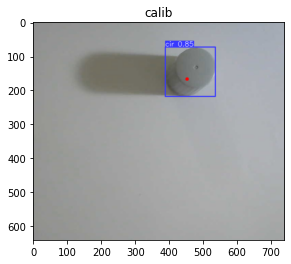

In [260]:
#tính toán sai khác
h_a = 3.7
h_c = 40

x_a = x_p + h_a / h_c *(x_c - x_p) + 20
y_a = y_p + h_a / h_c *(y_c - y_p) 

calib_img = cv2.circle(img_old, (int(x_a), int(y_a)), radius = 0, color= [0,0,255], thickness= 10)
previewImg('calib',calib_img)

In [261]:
# real_detect =  cv2.circle(calib_img, (int(x_a),int(y_a)), radius=int(r_centers)+1, color = (0,0,255), thickness = 2)
# previewImg('r', real_detect)

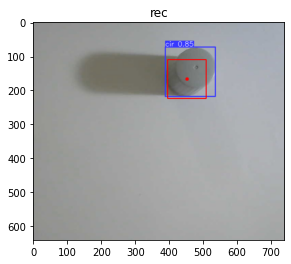

In [262]:
#vẽ hình chữ nhật bao ngoài đường tròn
x_1 = x_a - r_centers
y_1 = y_a + r_centers

x_2 = x_a + r_centers
y_2 = y_a - r_centers

real_detect_rec = cv2.rectangle(calib_img, (int(x_1), int(y_1)), (int(x_2), int(y_2)), color=(0, 0, 255), thickness=2)
previewImg('rec', real_detect_rec)